In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings

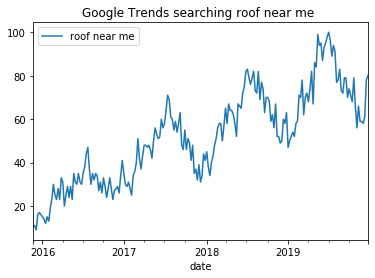

In [2]:
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US', tz=360)
keywords = ['roof near me']
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2015-11-22 2019-12-29',
     geo='US',
     gprop='')
traindata = pytrend.interest_over_time()
traindata= traindata.drop(labels=['isPartial'],axis='columns')
trainimage = traindata.plot(title = 'Google Trends searching roof near me ')
trainfig = trainimage.get_figure()
trainfig.savefig('figure1.png')
traindata.to_csv('ROOFNEARME_train.csv', encoding='utf_8_sig')

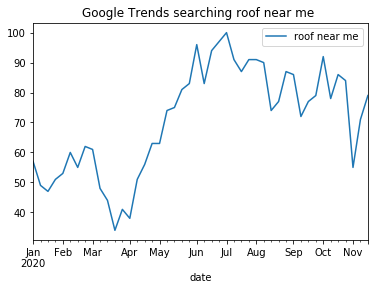

In [3]:
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2020-01-05 2020-11-15',
     geo='US',
     gprop='')
testdata = pytrend.interest_over_time()
testdata= testdata.drop(labels=['isPartial'],axis='columns')
testimage = testdata.plot(title = 'Google Trends searching roof near me ')
testfig = testimage.get_figure()
testfig.savefig('figure1.png')
testdata.to_csv('ROOFNEARME_test.csv', encoding='utf_8_sig')

In [4]:
train=pd.read_csv("ROOFNEARME_train.csv")

In [5]:
test=pd.read_csv("ROOFNEARME_test.csv")

In [6]:
train.rename(columns = {'roof near me':'search_count'}, inplace = True)
test.rename(columns = {'roof near me':'search_count'}, inplace = True)

In [7]:
train_original=train.copy()
test_original=test.copy()

In [8]:
train.columns, test.columns

(Index(['date', 'search_count'], dtype='object'),
 Index(['date', 'search_count'], dtype='object'))

In [9]:
train.dtypes, test.dtypes

(date            object
 search_count     int64
 dtype: object, date            object
 search_count     int64
 dtype: object)

In [10]:
train.shape, test.shape

((215, 2), (46, 2))

In [11]:
train.head

<bound method NDFrame.head of            date  search_count
0    2015-11-22            11
1    2015-11-29            11
2    2015-12-06             9
3    2015-12-13            16
4    2015-12-20            17
..          ...           ...
210  2019-12-01            59
211  2019-12-08            58
212  2019-12-15            61
213  2019-12-22            78
214  2019-12-29            80

[215 rows x 2 columns]>

In [12]:
train['date'] = pd.to_datetime(train.date,format='%Y-%m-%d')
test['date'] = pd.to_datetime(test.date,format='%Y-%m-%d')
train_original['date'] = pd.to_datetime(train_original.date,format='%Y-%m-%d')
test_original['date'] = pd.to_datetime(test_original.date,format='%Y-%m-%d')

In [13]:
train.head

<bound method NDFrame.head of           date  search_count
0   2015-11-22            11
1   2015-11-29            11
2   2015-12-06             9
3   2015-12-13            16
4   2015-12-20            17
..         ...           ...
210 2019-12-01            59
211 2019-12-08            58
212 2019-12-15            61
213 2019-12-22            78
214 2019-12-29            80

[215 rows x 2 columns]>

In [14]:
for i in (train, test, test_original, train_original):
    i['year']=i.date.dt.year
    i['month']=i.date.dt.month

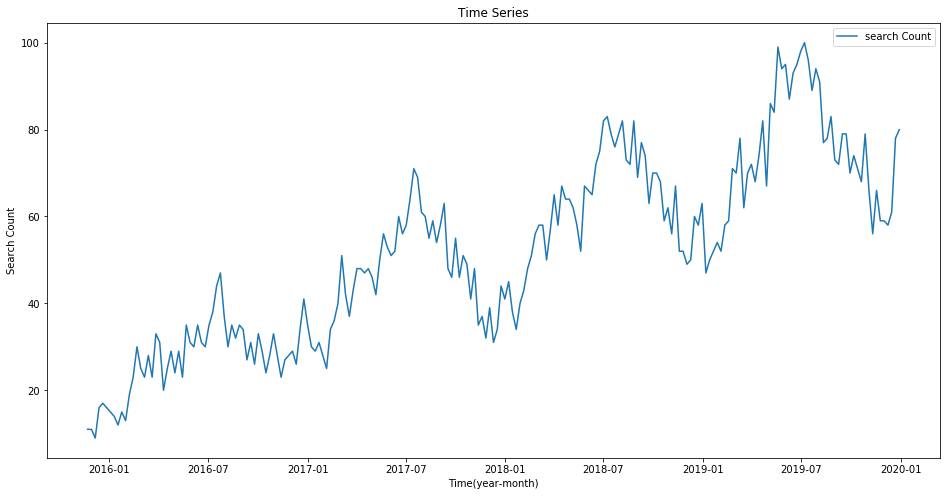

In [15]:
train.index = train['date']
ts = train['search_count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='search Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Search Count")
plt.legend(loc='best')

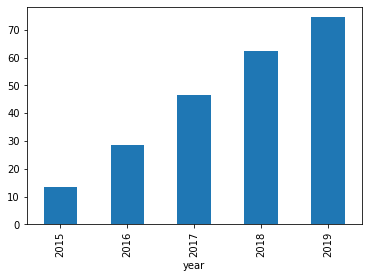

In [16]:
train.groupby('year')['search_count'].mean().plot.bar()

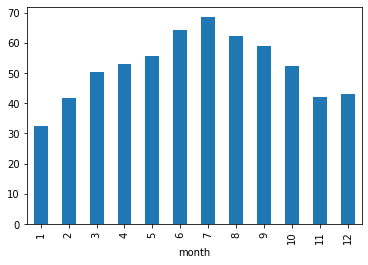

In [17]:
train.groupby('month')['search_count'].mean().plot.bar()

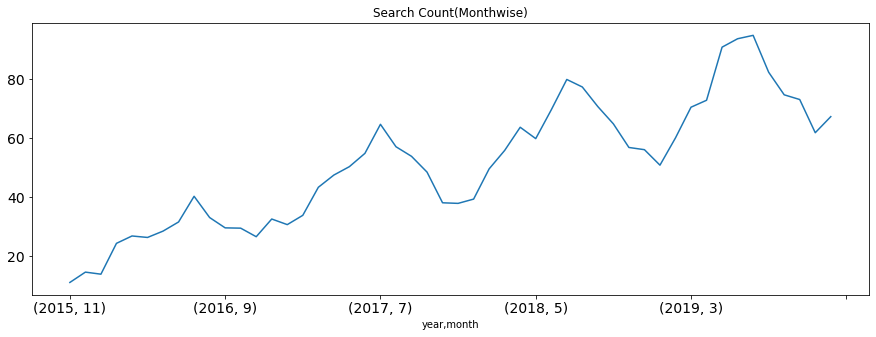

In [18]:
temp=train.groupby(['year', 'month'])['search_count'].mean()
temp.plot(figsize=(15,5), title= 'Search Count(Monthwise)', fontsize=14)

In [19]:
train.Timestamp = pd.to_datetime(train.date,format='%Y-%m-%d')
train.index = train.Timestamp
# Converting to monthly mean
monthly = train.resample('M').mean()

C:\Users\RAIBOT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


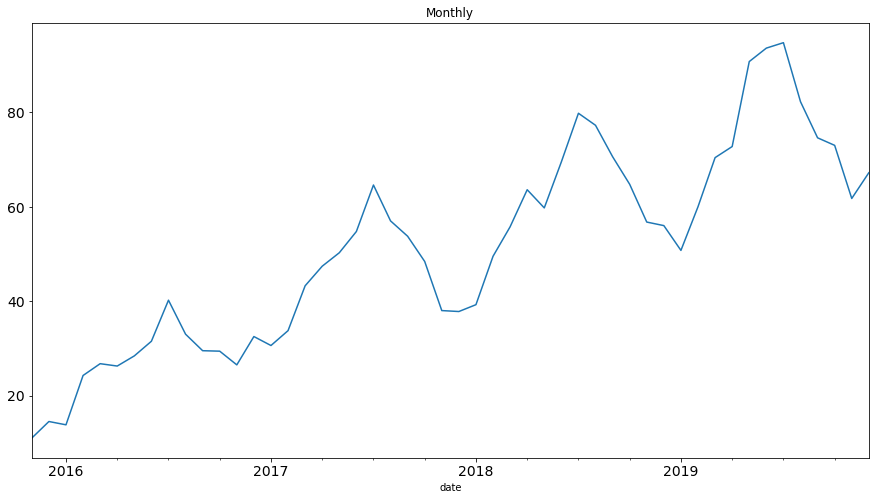

In [20]:
monthly.search_count.plot(figsize=(15,8), title= 'Monthly', fontsize=14)

plt.show()

In [21]:
test.Timestamp=pd.to_datetime(test.date,format='%Y-%m-%d')
test.index = test.Timestamp
test = test.resample('M').mean()

C:\Users\RAIBOT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [22]:
train.Timestamp=pd.to_datetime(train.date,format='%Y-%m-%d')
train.index = train.Timestamp
train = train.resample('M').mean()

In [23]:
Train=train.loc['2015-11-11':'2018-12-31']
valid=train.loc['2018-12-29':'2019-12-30']

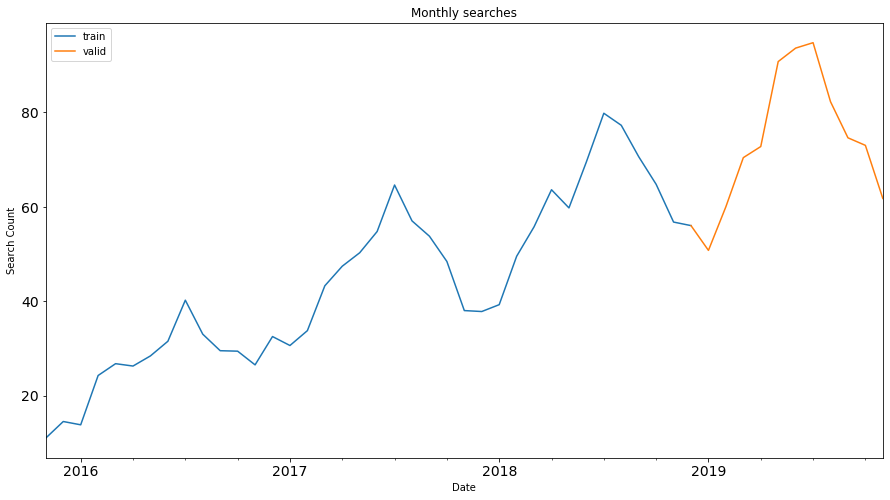

In [24]:
Train.search_count.plot(figsize=(15,8), title="Monthly searches", fontsize=14, label='train')
valid.search_count.plot(figsize=(15,8), title="Monthly searches", fontsize=14, label='valid')
plt.xlabel("Date")
plt.ylabel("Search Count")
plt.legend(loc='best')
plt.show()

C:\Users\RAIBOT\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\RAIBOT\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\RAIBOT\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


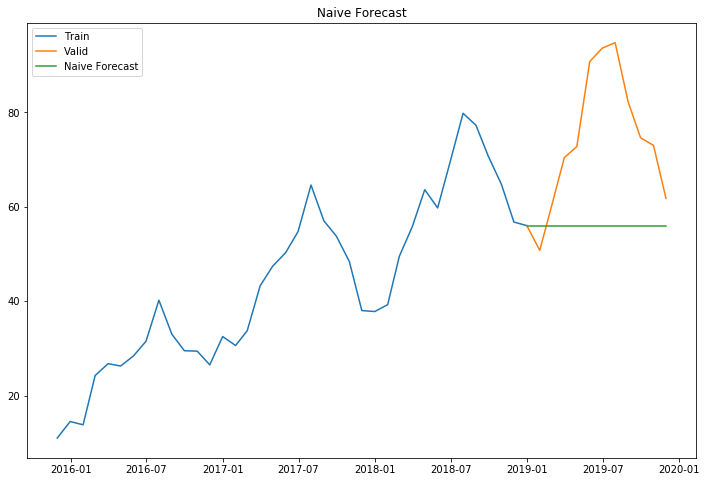

In [25]:
dd = np.asarray(Train.search_count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['search_count'], label='Train')
plt.plot(valid.index, valid['search_count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.search_count, y_hat.naive))
print(rms)

22.38201472909294


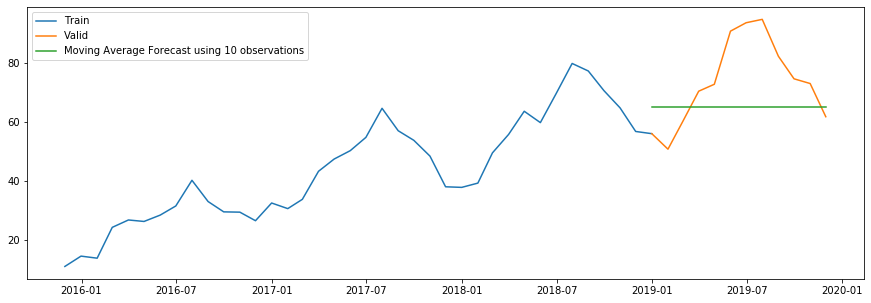

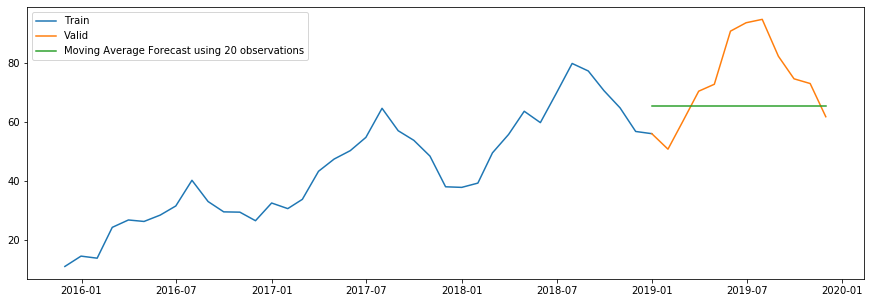

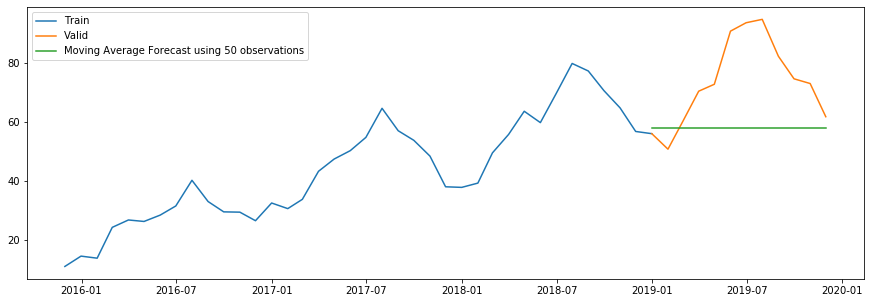

In [27]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['search_count'].rolling(5).mean().iloc[-1]
#average of last 5 observations
plt.figure(figsize=(15,5))
plt.plot(Train['search_count'], label='Train')
plt.plot(valid['search_count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['search_count'].rolling(10).mean().iloc[-1]
#average of last 10 observations
plt.figure(figsize=(15,5))
plt.plot(Train['search_count'], label='Train')
plt.plot(valid['search_count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['search_count'].rolling(15).mean().iloc[-1]
#average of last 15 observations
plt.figure(figsize=(15,5))
plt.plot(Train['search_count'], label='Train')
plt.plot(valid['search_count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [28]:
rms = sqrt(mean_squared_error(valid.search_count, y_hat_avg.moving_avg_forecast))
print(rms)

21.029463061777562


C:\Users\RAIBOT\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


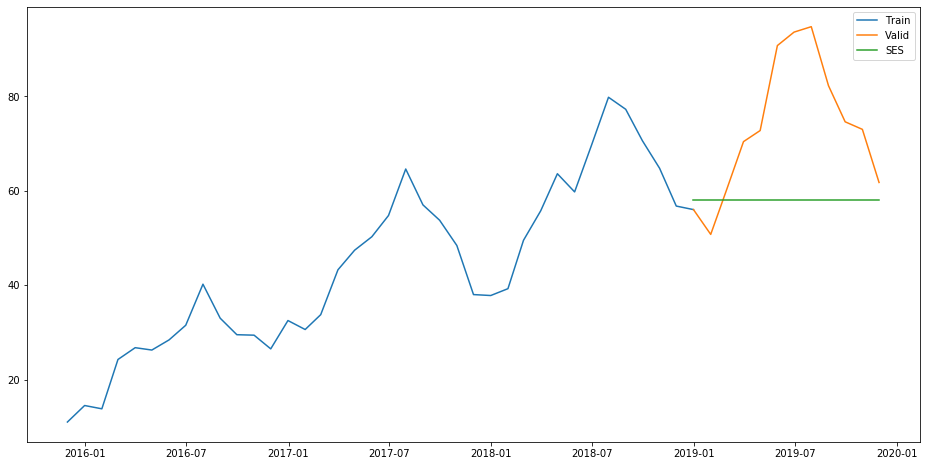

In [29]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['search_count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['search_count'], label='Train')
plt.plot(valid['search_count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [30]:
rms = sqrt(mean_squared_error(valid.search_count, y_hat_avg.SES))
print(rms)

20.799032462414356


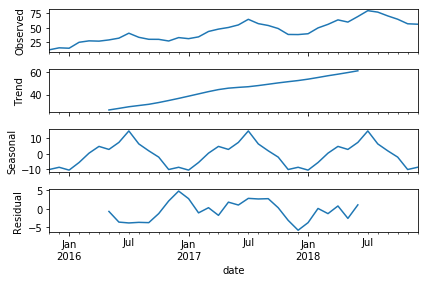

In [31]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.search_count).plot()
result = sm.tsa.stattools.adfuller(train.search_count)
plt.show()

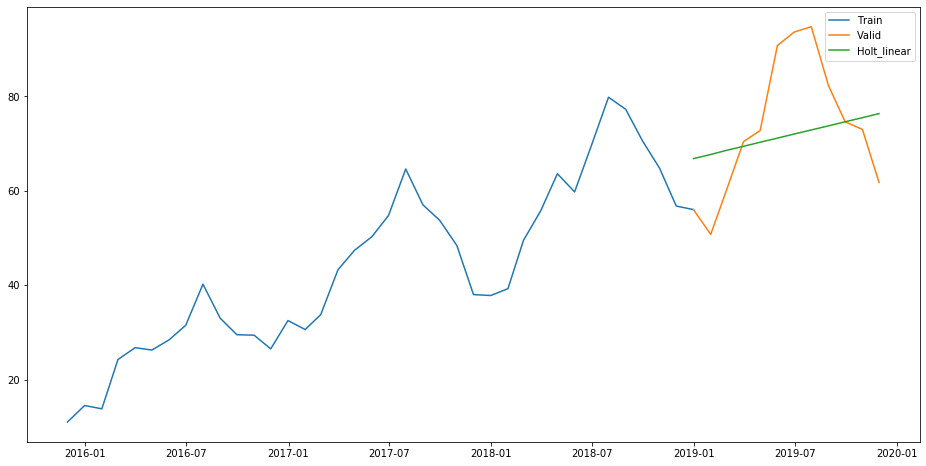

In [32]:
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['search_count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['search_count'], label='Train')
plt.plot(valid['search_count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [33]:
rms = sqrt(mean_squared_error(valid.search_count, y_hat_avg.Holt_linear))
print(rms)

13.241698571002342


In [34]:
predict=fit1.forecast(len(test))
test['prediction']=predict

In [35]:
test.columns

Index(['search_count', 'year', 'month', 'prediction'], dtype='object')

In [36]:
test.head

<bound method NDFrame.head of             search_count    year  month  prediction
date                                               
2020-01-31     51.000000  2020.0    1.0   66.810948
2020-02-29     57.500000  2020.0    2.0   67.677113
2020-03-31     45.600000  2020.0    3.0   68.543278
2020-04-30     52.000000  2020.0    4.0   69.409443
2020-05-31     75.200000  2020.0    5.0   70.275609
2020-06-30     92.500000  2020.0    6.0   71.141774
2020-07-31     92.250000  2020.0    7.0   72.007939
2020-08-31     83.800000  2020.0    8.0   72.874104
2020-09-30     78.500000  2020.0    9.0   73.740270
2020-10-31     85.000000  2020.0   10.0   74.606435
2020-11-30     68.333333  2020.0   11.0   75.472600>

In [37]:
submission=test
#Converting the final submission to csv format
pd.DataFrame(submission, columns=['search_count','year','month','prediction']).to_csv("Holt linear.csv")

In [38]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['search_count']),seasonal_periods=7,trend='add',seasonal='add',).fit()

C:\Users\RAIBOT\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


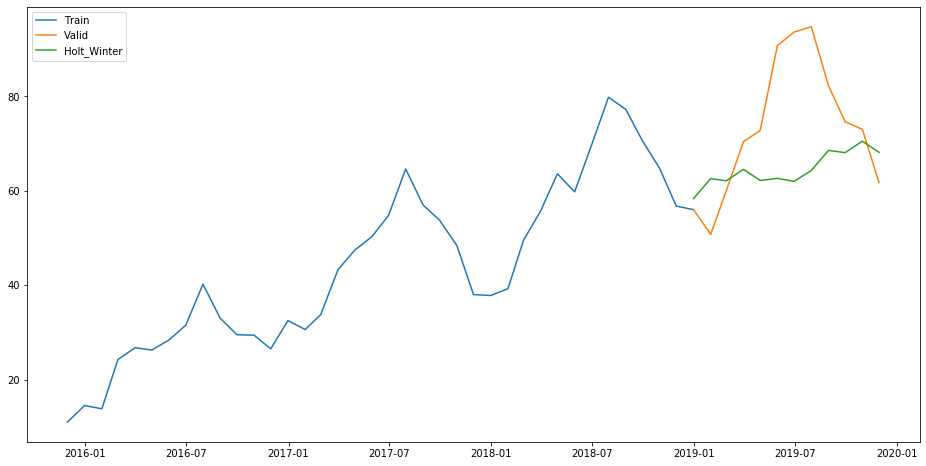

In [39]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot( Train['search_count'], label='Train')
plt.plot(valid['search_count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [40]:
rms = sqrt(mean_squared_error(valid.search_count, y_hat_avg.Holt_Winter))
print(rms)

16.566574213101585


In [41]:
predict=fit1.forecast(len(test))

In [42]:
test['prediction']=predict

In [43]:
submission=test
pd.DataFrame(submission, columns=['search_count','year','month','prediction']).to_csv("Holt Winters.csv")
#Converting the final submission to csv formatcsv")

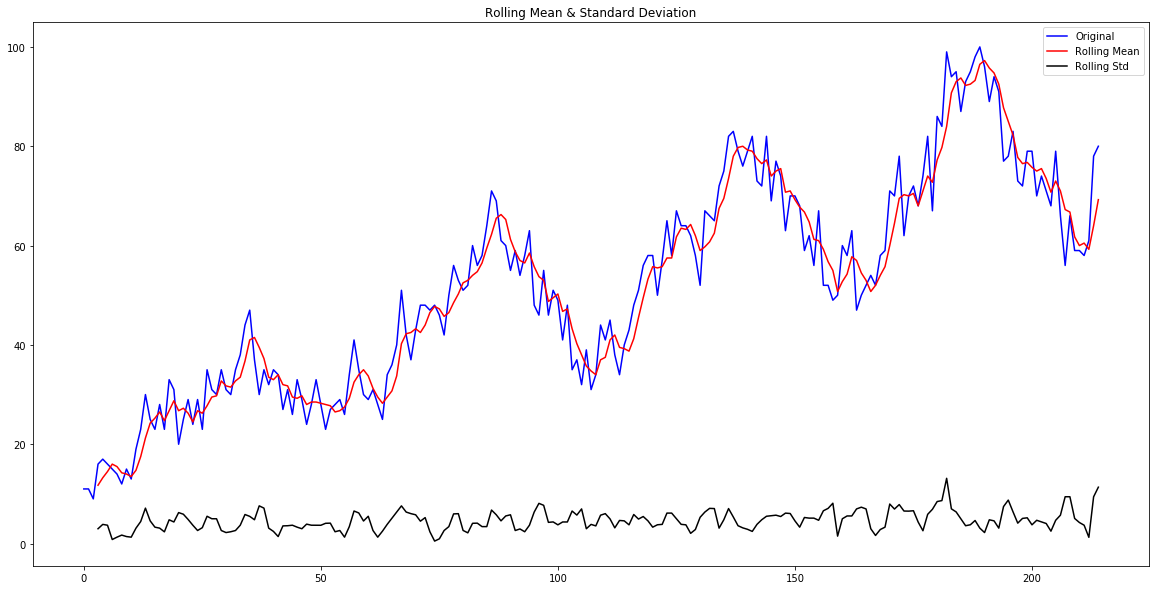

Results of Dickey-Fuller Test:
Test Statistic                  -1.868567
p-value                          0.346989
#Lags Used                       2.000000
Number of Observations Used    212.000000
Critical Value (1%)             -3.461578
Critical Value (5%)             -2.875272
Critical Value (10%)            -2.574089
dtype: float64


In [44]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(train_original):
#Determining rolling statistics
    rolmean = train_original.rolling(4).mean() # 24 hours in each day
    rolstd = train_original.rolling(4).std()
#Plot rolling statistics:
    orig = plt.plot(train_original, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
#Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(train_original, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

test_stationarity(train_original['search_count'])

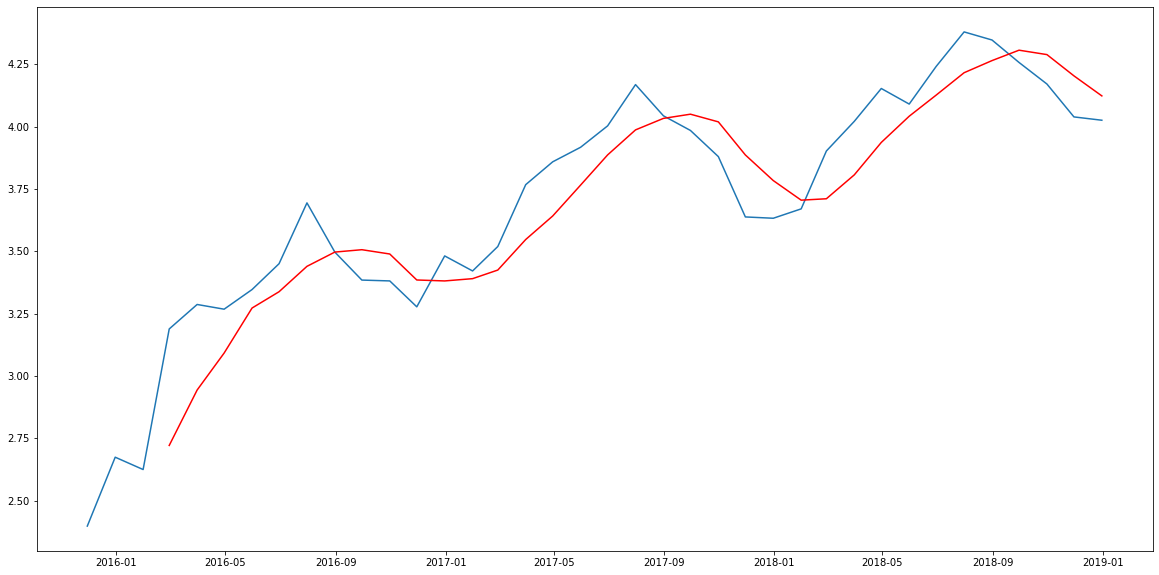

In [45]:
Train_log = np.log(Train['search_count'])
valid_log = np.log(valid['search_count'])

moving_avg = Train_log.rolling(4).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

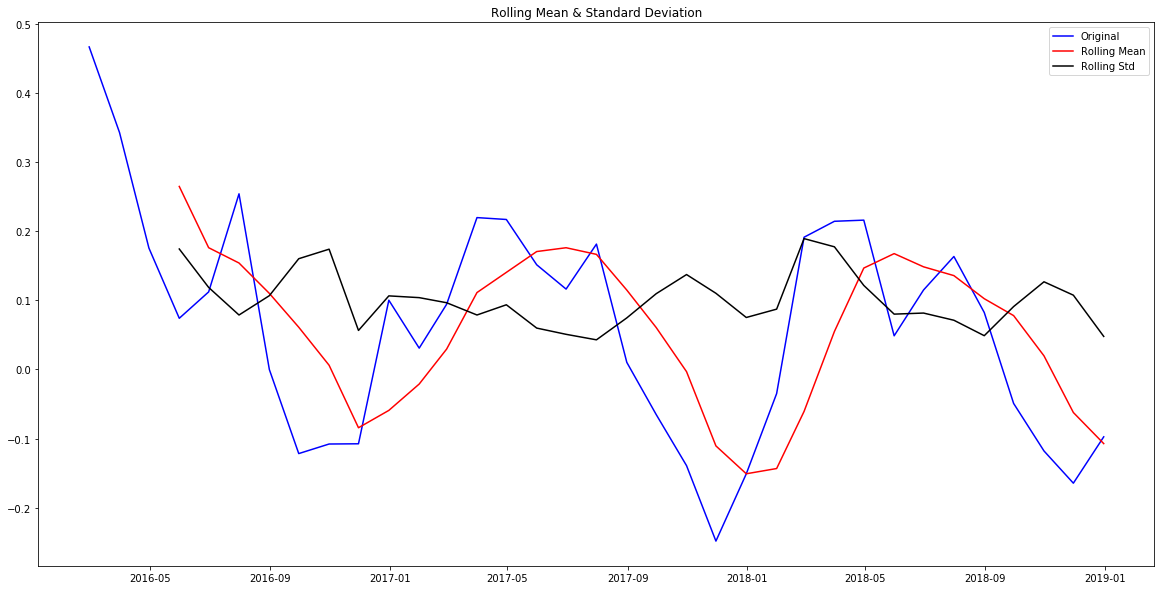

Results of Dickey-Fuller Test:
Test Statistic                 -3.315801
p-value                         0.014187
#Lags Used                      7.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [46]:
train_log_moving_avg_diff = Train_log - moving_avg
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

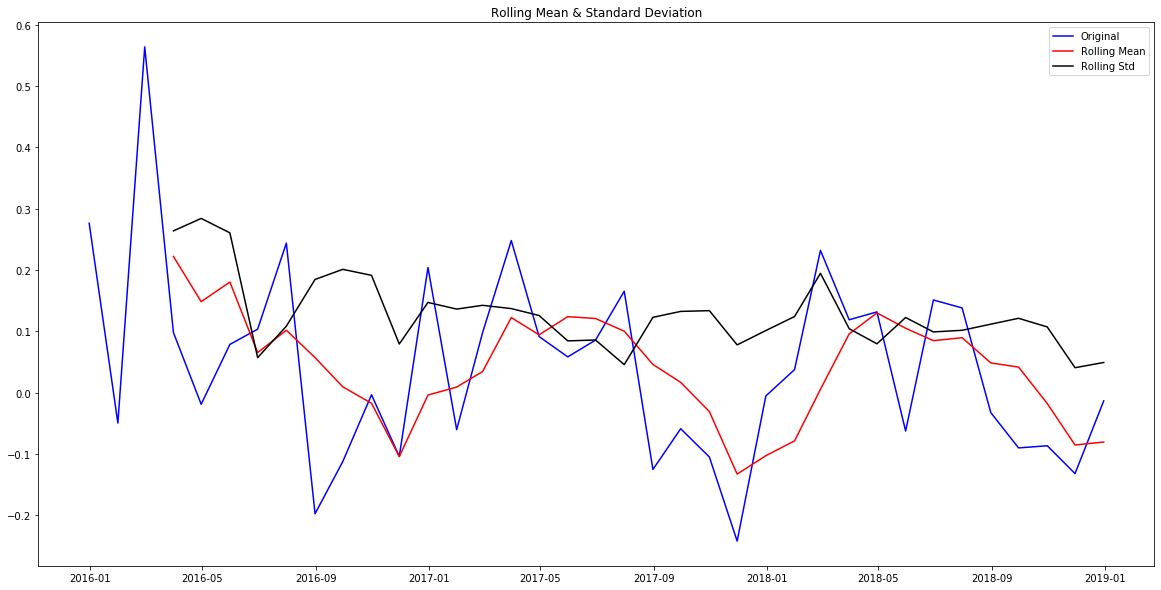

Results of Dickey-Fuller Test:
Test Statistic                 -4.902468
p-value                         0.000034
#Lags Used                      7.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


In [47]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

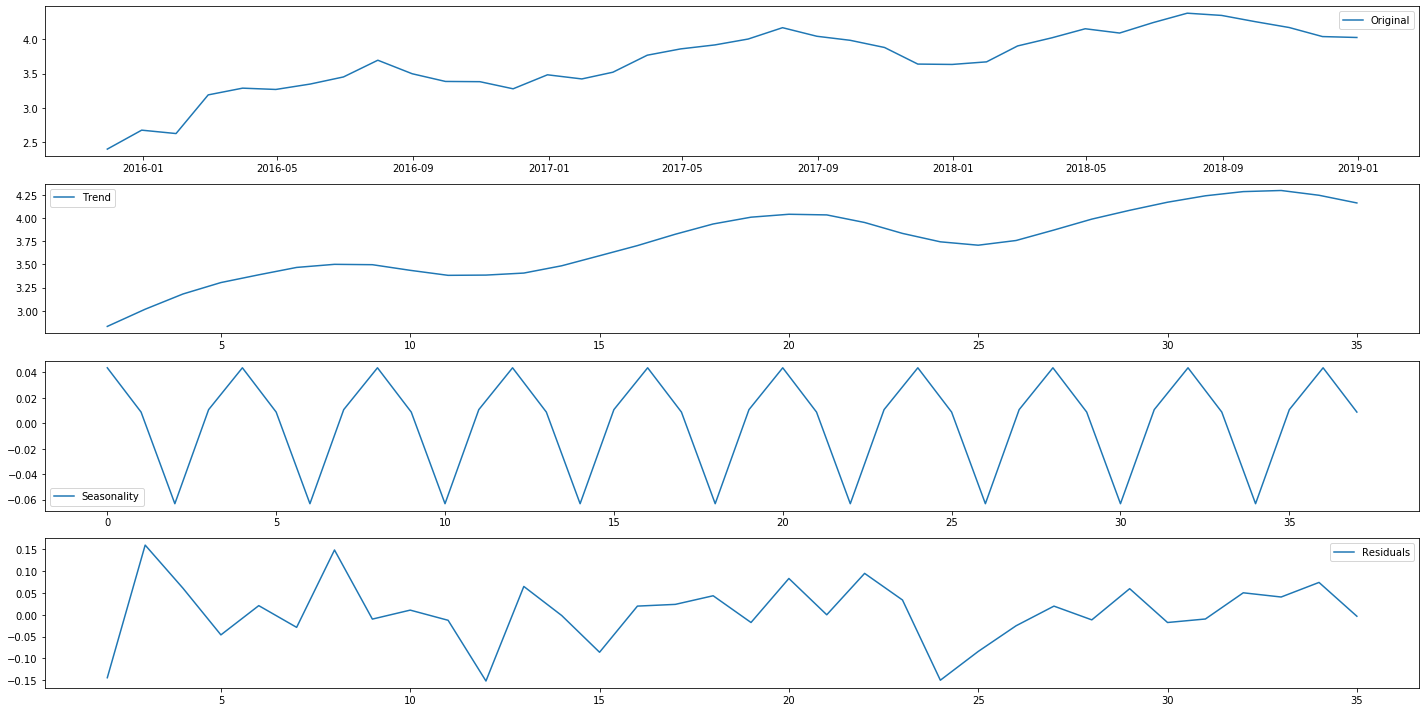

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).search_count.values, freq = 4)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

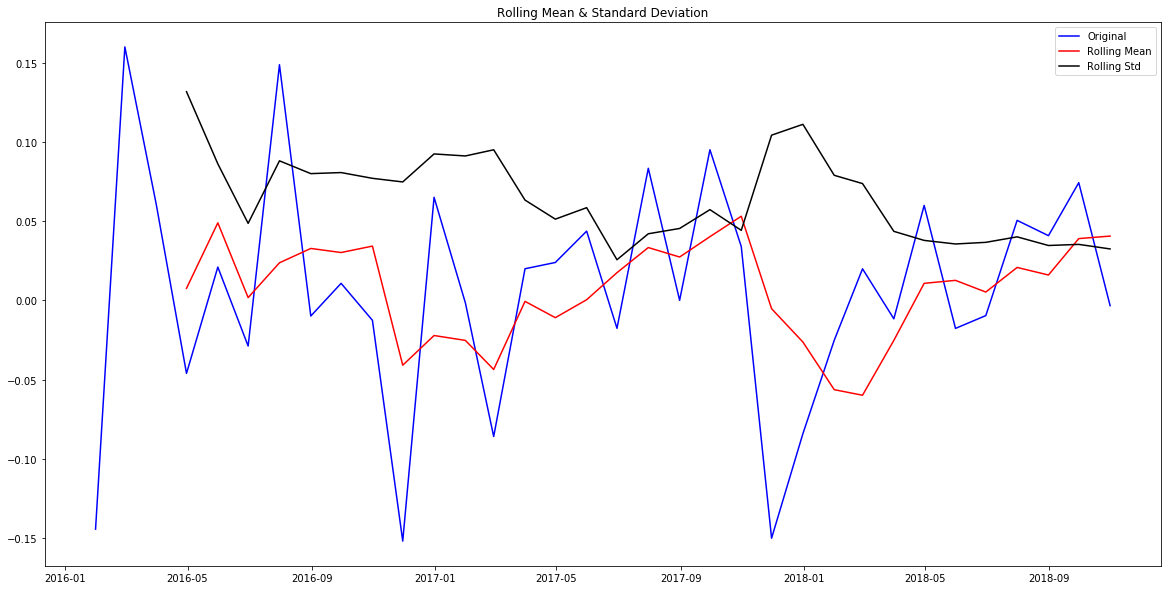

Results of Dickey-Fuller Test:
Test Statistic                 -3.817707
p-value                         0.002731
#Lags Used                     10.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [49]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

C:\Users\RAIBOT\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


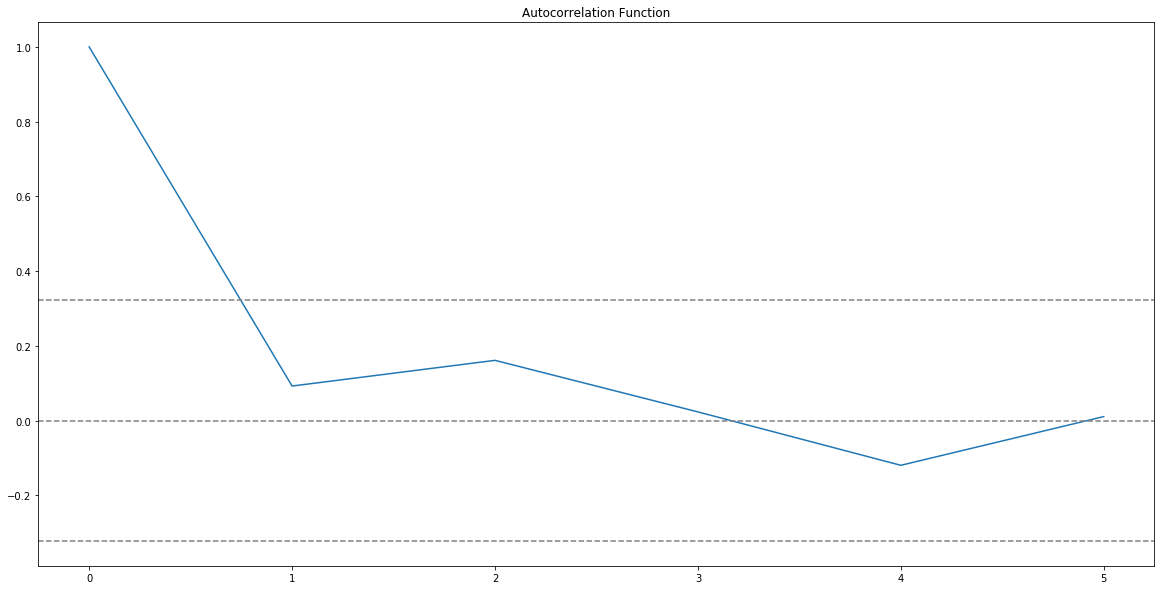

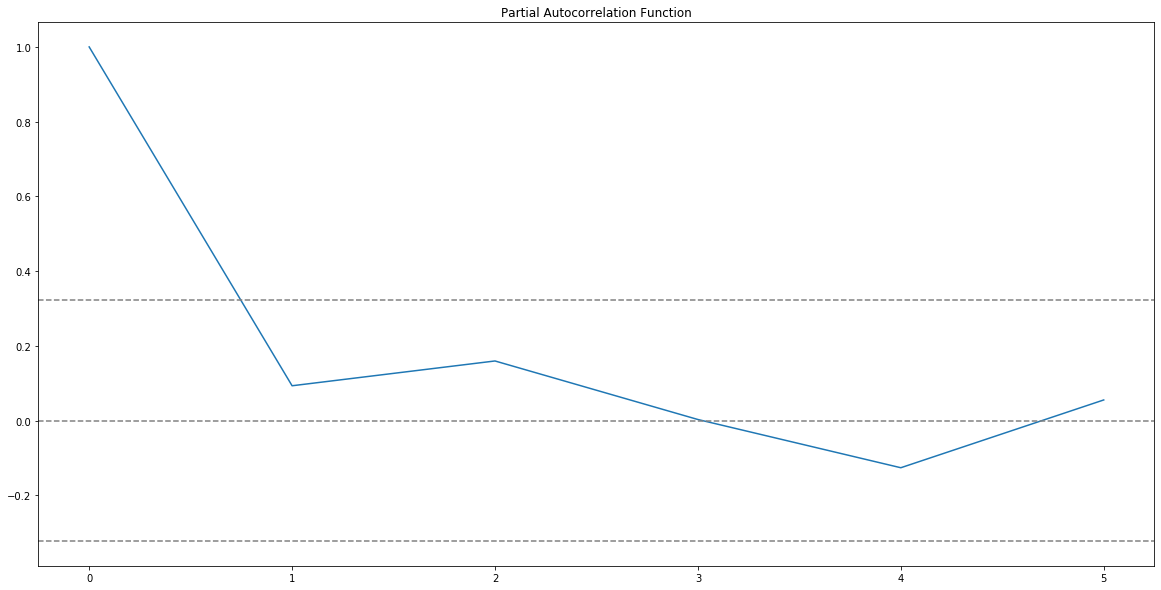

In [50]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=5)
lag_pacf = pacf(train_log_diff.dropna(), nlags=5, method='ols')

plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

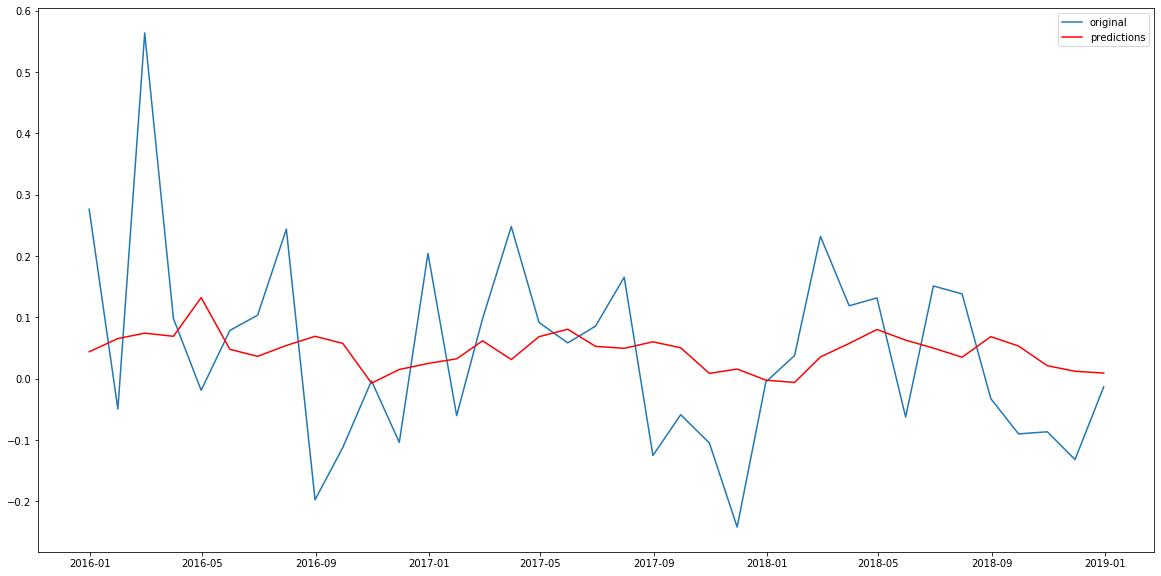

In [51]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Train_log, order=(2, 1, 0)) #here the q value is zero since it is just the AR model
results_AR = model.fit(disp=0)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

In [52]:
valid.shape[0]

12

NameError: name 'MA_predict' is not defined

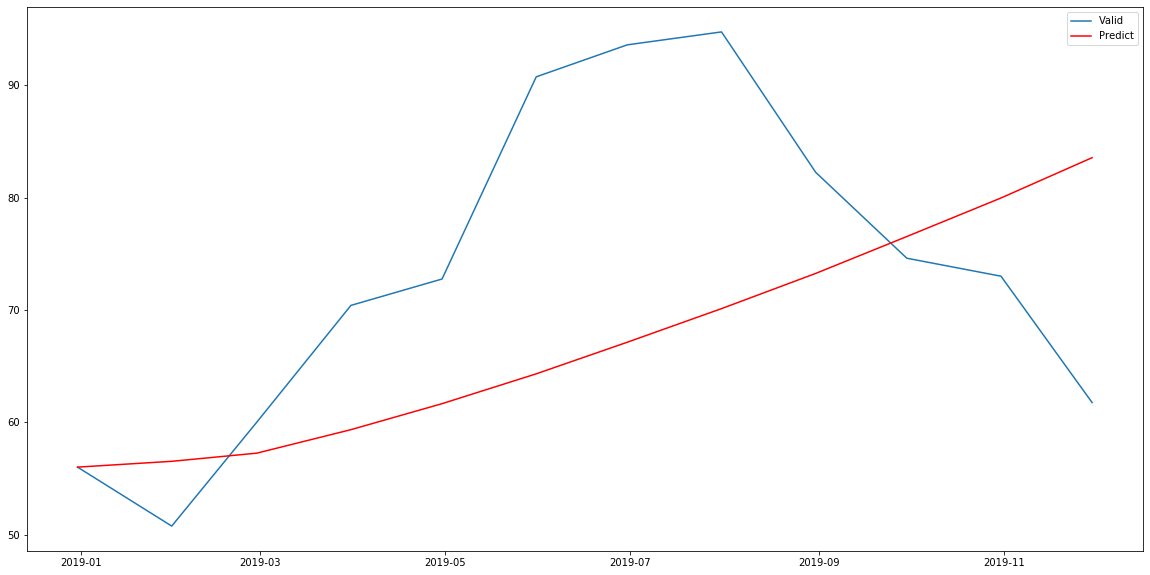

In [53]:
AR_predict=results_AR.predict(start="2018-12-31", end="2019-11-30", dynamic=True)
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['search_count'])[0], index = valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)
plt.plot(valid['search_count'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['search_count']))/valid.shape[0]))
plt.show()

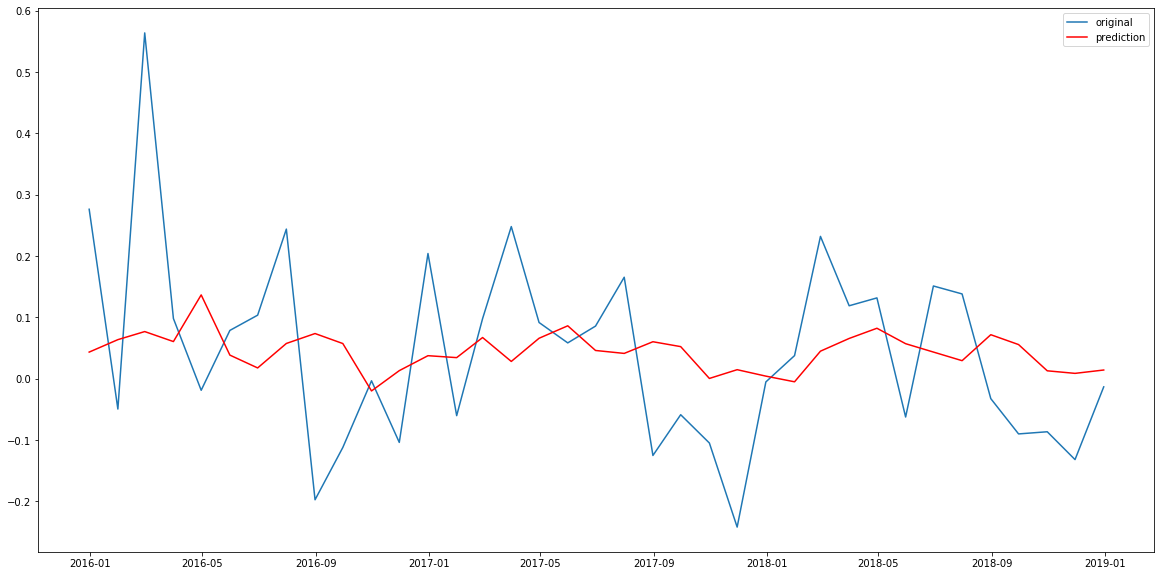

In [54]:
model = ARIMA(Train_log, order=(0, 1, 2)) # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=0)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

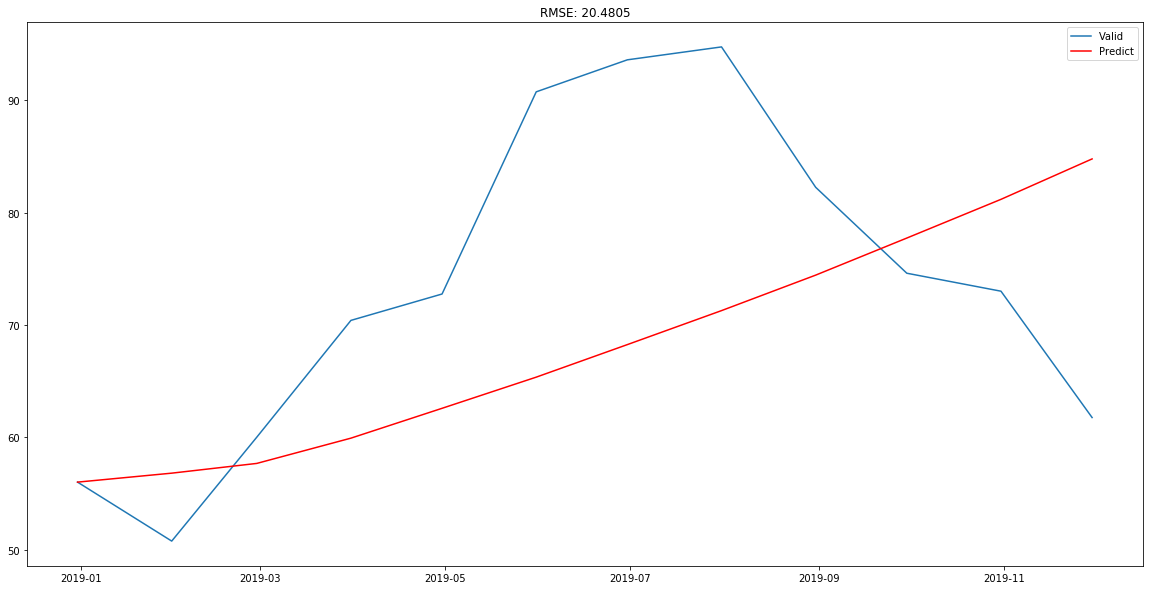

In [55]:
MA_predict=results_MA.predict(start="2018-12-31", end="2019-11-30")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['search_count'])[0], index = valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

plt.plot(valid['search_count'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['search_count']))/valid.shape[0]))
plt.show()

C:\Users\RAIBOT\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


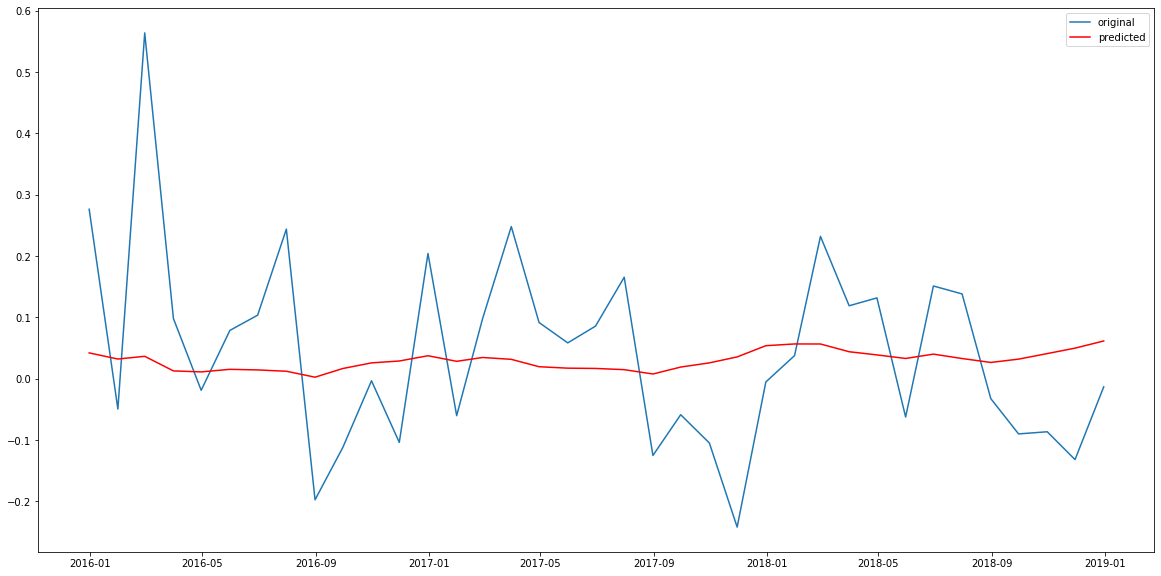

In [56]:
model = ARIMA(Train_log, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

In [57]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['search_count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)    
    plt.plot(given_set['search_count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['search_count']))/valid.shape[0]))
    plt.show()

def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    plt.plot(given_set['search_count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['search_count']))/valid.shape[0]))
    plt.show()

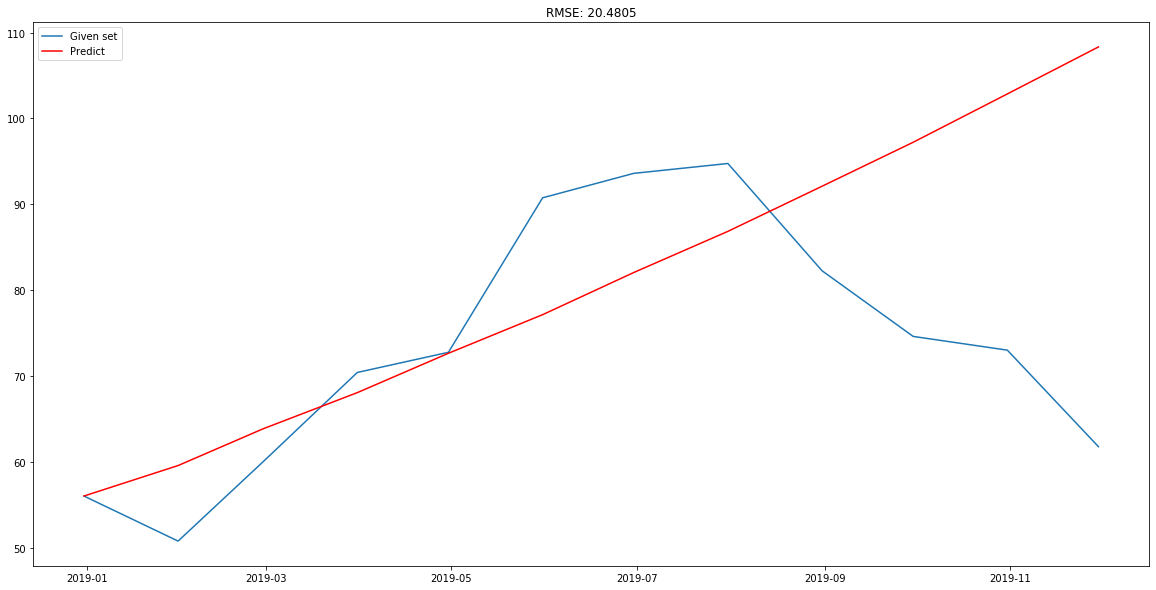

In [58]:
ARIMA_predict_diff=results_ARIMA.predict(start="2018-12-31", end="2019-11-30")
check_prediction_diff(ARIMA_predict_diff, valid)

C:\Users\RAIBOT\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


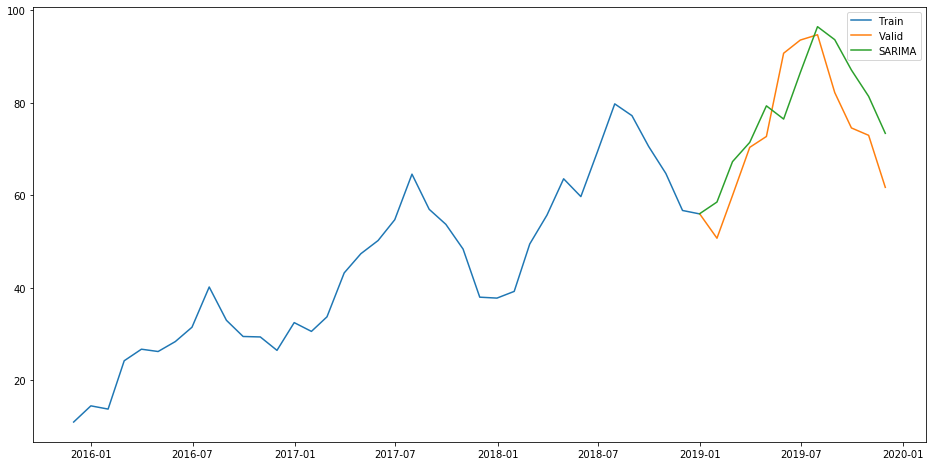

In [59]:
import statsmodels.api as sm

y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.search_count, order=(2, 1, 4),seasonal_order=(0,1,0,12)).fit()
#start_params = np.r_[[0] * (fit1.k_params - 1), 1]
#res_sl_ar = fit1.fit(start_params=start_params)
#y_hat_avg['SARIMA'] = res_sl_ar.predict(len(y_hat_avg), dynamic= True)
y_hat_avg['SARIMA'] = fit1.predict(start="2018-12-31", end="2019-11-30", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( Train['search_count'], label='Train')
plt.plot(valid['search_count'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [60]:
y_hat_avg['SARIMA']

date
2018-12-31    56.062263
2019-01-31    58.574501
2019-02-28    67.311417
2019-03-31    71.478328
2019-04-30    79.372146
2019-05-31    76.516500
2019-06-30    86.564859
2019-07-31    96.492629
2019-08-31    93.682814
2019-09-30    87.124638
2019-10-31    81.426363
2019-11-30    73.431822
Freq: M, Name: SARIMA, dtype: float64

In [61]:
len(y_hat_avg)

12

In [62]:
Train.search_count

date
2015-11-30    11.00
2015-12-31    14.50
2016-01-31    13.80
2016-02-29    24.25
2016-03-31    26.75
2016-04-30    26.25
2016-05-31    28.40
2016-06-30    31.50
2016-07-31    40.20
2016-08-31    33.00
2016-09-30    29.50
2016-10-31    29.40
2016-11-30    26.50
2016-12-31    32.50
2017-01-31    30.60
2017-02-28    33.75
2017-03-31    43.25
2017-04-30    47.40
2017-05-31    50.25
2017-06-30    54.75
2017-07-31    64.60
2017-08-31    57.00
2017-09-30    53.75
2017-10-31    48.40
2017-11-30    38.00
2017-12-31    37.80
2018-01-31    39.25
2018-02-28    49.50
2018-03-31    55.75
2018-04-30    63.60
2018-05-31    59.75
2018-06-30    69.50
2018-07-31    79.80
2018-08-31    77.25
2018-09-30    70.60
2018-10-31    64.75
2018-11-30    56.75
2018-12-31    56.00
Freq: M, Name: search_count, dtype: float64

In [63]:
rms = sqrt(mean_squared_error(valid.search_count, y_hat_avg.SARIMA))
print(rms)

8.70759229650495


In [64]:
test

,search_count,year,month,prediction
date,,,,
2020-01-31,51.000000,2020.0,1.0,58.317465
2020-02-29,57.500000,2020.0,2.0,62.574645
2020-03-31,45.600000,2020.0,3.0,62.109775
2020-04-30,52.000000,2020.0,4.0,64.531822
2020-05-31,75.200000,2020.0,5.0,62.166623
2020-06-30,92.500000,2020.0,6.0,62.619828
2020-07-31,92.250000,2020.0,7.0,61.979341
2020-08-31,83.800000,2020.0,8.0,64.278810
2020-09-30,78.500000,2020.0,9.0,68.535990


In [65]:
predict=fit1.predict(start="2020-1-31", end="2020-11-30", dynamic=True)

C:\Users\RAIBOT\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [66]:
test['prediction']=predict

In [67]:
submission=test
#Converting the final submission to csv format
pd.DataFrame(submission, columns=['search_count','year','month','prediction']).to_csv("SARIMA.csv")

In [68]:
pwd

'C:\\Users\\RAIBOT\\Desktop'

In [69]:
predict_future=fit1.predict(start="2020-12-31", end="2021-12-31", dynamic=True)

C:\Users\RAIBOT\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [70]:
predict_future

2020-12-31     89.220451
2021-01-31     91.724894
2021-02-28    100.485321
2021-03-31    104.699450
2021-04-30    112.617532
2021-05-31    109.747449
2021-06-30    119.779758
2021-07-31    129.709174
2021-08-31    126.907439
2021-09-30    120.351082
2021-10-31    114.649587
2021-11-30    106.653158
2021-12-31    105.834418
Freq: M, dtype: float64